<a href="https://colab.research.google.com/github/juanpajaro/IA_en_salud_diplomado_puj/blob/main/class_1_donde_esta_el_algoritmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos librerias

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils.fixes import parse_version

#Cargamos los datos

In [2]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

#Hacemos el preprocesamiento de los datos

In [9]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(442, 10)


In [23]:
df_X = pd.DataFrame(X)
column_names = [
    "age",
    "sex",
    "bmi",
    "bp",
    "s1_tc",
    "s2_ldl",
    "s3_hdl",
    "s4_tch",
    "s5_ltg",
    "s6_glu"
]

df_X.rename(
    columns={i: name for i, name in enumerate(column_names)},
    inplace=True
)
df_X.head()


,age,sex,bmi,bp,s1_tc,s2_ldl,s3_hdl,s4_tch,s5_ltg,s6_glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
#Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

#Definimos hyperparametros
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

#Ajustamos el modelo (Fit model)

In [4]:
#Primero entrenamos
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

#Evaluamos
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3018.1786


#Evaluamos la desviación

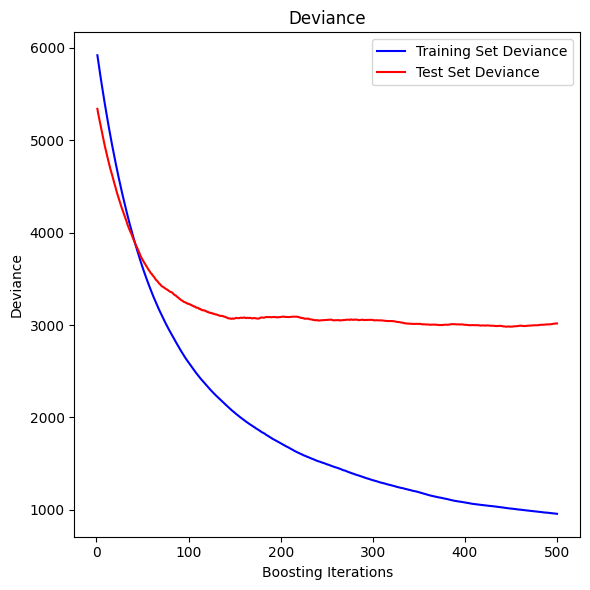

In [5]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### Guardar el modelo entrenado

Para guardar el modelo entrenado, utilizaremos la biblioteca `joblib`. Esto nos permite serializar el modelo y guardarlo en un archivo, que luego podremos cargar para usarlo o compartirlo.

In [6]:
# Definir la ruta y el nombre del archivo para guardar el modelo
model_filename = 'gradient_boosting_model.joblib'

# Guardar el modelo
joblib.dump(reg, model_filename)

print(f"Modelo guardado exitosamente en '{model_filename}'")

Modelo guardado exitosamente en 'gradient_boosting_model.joblib'
